In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandasql as ps
from pandasql import sqldf


In [2]:
df1=pd.read_csv('ab_data.csv')
df1

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [3]:
df2=pd.read_csv('countries.csv')
df2

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


## Merging both tables

In [4]:
df=pd.merge(df1,df2,on='user_id',how ='inner')
df

,user_id,timestamp,group,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,US
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,US
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,US
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,US


In [5]:
df=df.rename({'group':'gp'},axis=1)
df

,user_id,timestamp,gp,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,US
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,US
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,US
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,US


In [6]:
df.head()

,user_id,timestamp,gp,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US


### 1. Click through per rate 

In [7]:
g_page=df.groupby(['gp','landing_page']).count()['user_id']/df.groupby('gp').count()['user_id']
click_rate=(g_page*100).unstack()
click_rate

landing_page,new_page,old_page
gp,,
control,1.309765,98.690235
treatment,98.665770,1.334230


Text(0, 0.5, '% of click through rate')

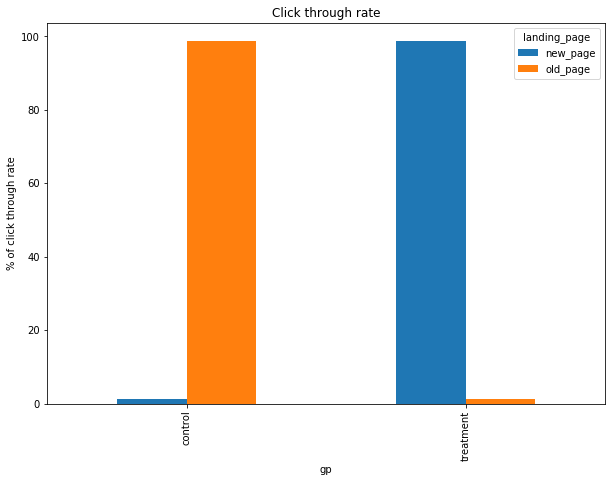

In [8]:
ax=click_rate.plot(
kind='bar',
    title='Click through rate',
    figsize=(10,7)
)
ax.set_ylabel('% of click through rate')

##  

### The % between the group and converted (group intercation )

In [9]:
g_conv=df.groupby(['gp','converted']).count()['user_id']/df.groupby('converted').count()['user_id']
click_conv=(g_conv*100).unstack()
click_conv

converted,0,1
gp,,
control,49.945418,50.296563
treatment,50.054582,49.703437


Text(0, 0.5, '% of interaction with group')

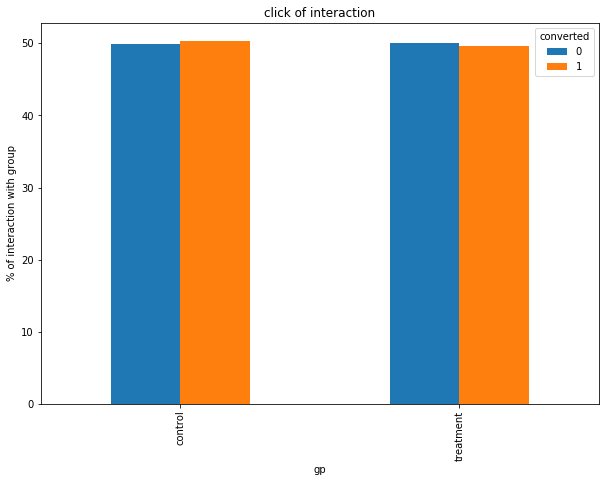

In [10]:
bx=click_conv.plot(
kind='bar',
    figsize=(10,7),
     title='click of interaction',
)
bx.set_ylabel('% of interaction with group')

##  

## 2. The Percentage between the page and converted

In [11]:
p=df.groupby(['landing_page','converted']).count()['user_id']/df.groupby('landing_page').count()['user_id']
p_conv=(p*100).unstack()
p_conv

converted,0,1
landing_page,,
new_page,88.115920,11.884080
old_page,87.952241,12.047759


Text(0, 0.5, '% of interaction with page')

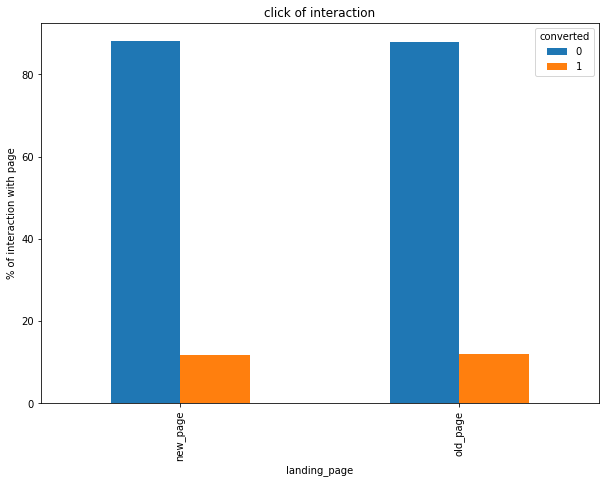

In [12]:
cx=p_conv.plot(
    kind='bar',
    figsize=(10,7),
     title='click of interaction',
)
cx.set_ylabel('% of interaction with page')


##  

### finding the % according to the pages,group ,conversion

In [13]:
p=df.groupby(['landing_page','gp','converted']).count()['user_id']/df.groupby('landing_page').count()['user_id']
p_conv=p.unstack()
p_conv

converted                      0         1
landing_page gp                           
new_page     control    0.011505  0.001589
             treatment  0.869654  0.117252
old_page     control    0.867875  0.118780
             treatment  0.011648  0.001698

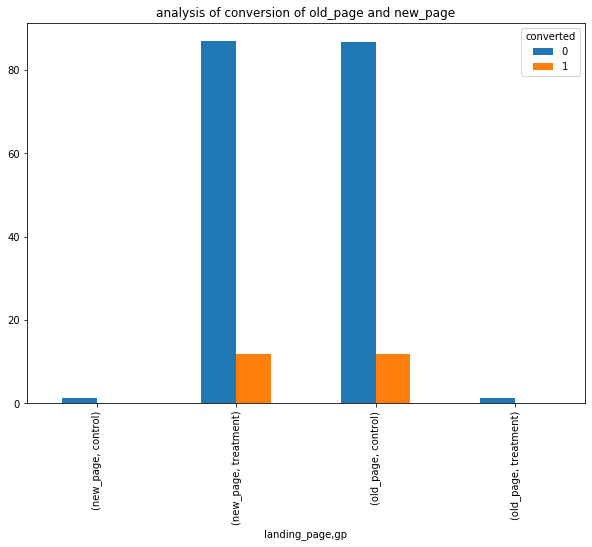

In [14]:
page_conv=(p_conv*100).plot(
kind='bar',
    figsize=(10,7),
title='analysis of conversion of old_page and new_page'
    
)

##  

## 4. Page % used in regards of country

In [15]:
z=df.groupby(['landing_page','gp','converted','country']).count()['user_id']/df.groupby('landing_page').count()['user_id']
z_rate=(z*100).unstack()
z_rate

country                                 CA         UK         US
landing_page gp        converted                                
new_page     control   0          0.059767   0.283213   0.807531
                       1          0.010867   0.043467   0.104592
             treatment 0          4.403725  21.550676  61.011009
                       1          0.554880   2.971359   8.198915
old_page     control   0          4.307962  21.730656  60.748851
                       1          0.580689   2.963889   8.333390
             treatment 0          0.052296   0.286609   0.825868
                       1          0.010188   0.033958   0.125646

Text(0, 0.5, '% of pages interaction with countries')

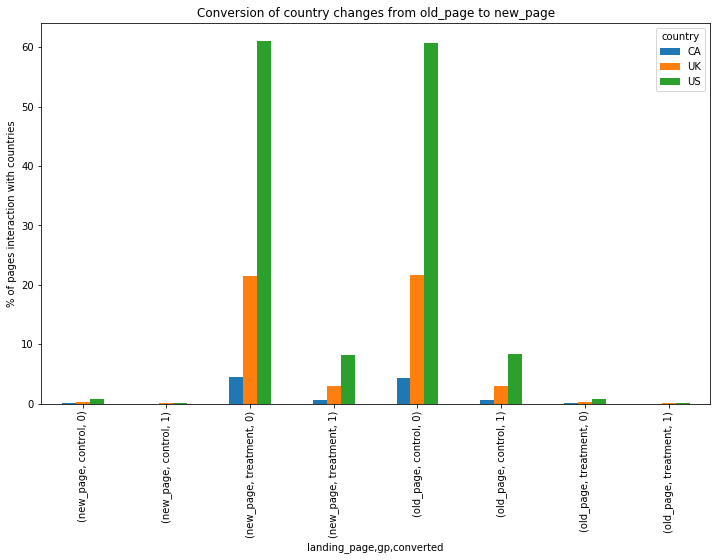

In [16]:
country_plot=(z_rate).plot(
kind='bar',
    figsize=(12,7),
    title='Conversion of country changes from old_page to new_page',
    
)
country_plot.set_ylabel('% of pages interaction with countries')

##  

### 3. Timestamp play what role in click through rates

In [17]:
df['country'].value_counts()

US    206364
UK     73419
CA     14695
Name: country, dtype: int64

In [18]:
sqldf("select count(timestamp),country from df group by country  ")

,count(timestamp),country
0,14695,CA
1,73419,UK
2,206364,US


In [37]:
sqldf("select time(timestamp) as time,count(user_id) as total_user from df group by time(timestamp) order by time(timestamp) desc ")


,time,total_user
0,23:59:59,5
1,23:59:57,3
2,23:59:56,3
3,23:59:55,3
4,23:59:54,7
...,...,...
83507,00:00:04,5
83508,00:00:03,3
83509,00:00:02,2
83510,00:00:01,4


In [20]:
f=sqldf("select date(timestamp) as date,count(user_id) as total_user from df group by date(timestamp)  ")
f

,date,total_user
0,2017-01-02,5783
1,2017-01-03,13394
2,2017-01-04,13284
3,2017-01-05,13124
4,2017-01-06,13528
5,2017-01-07,13381
6,2017-01-08,13564
7,2017-01-09,13439
8,2017-01-10,13523
9,2017-01-11,13553


In [21]:
f.sum()['total_user']

294478

In [22]:
sqldf('select date,max(total_user) as max from f' )

,date,max
0,2017-01-08,13564


In [23]:
sqldf('select date,min(total_user) as min from f' )

,date,min
0,2017-01-02,5783


Text(0, 0.5, 'users')

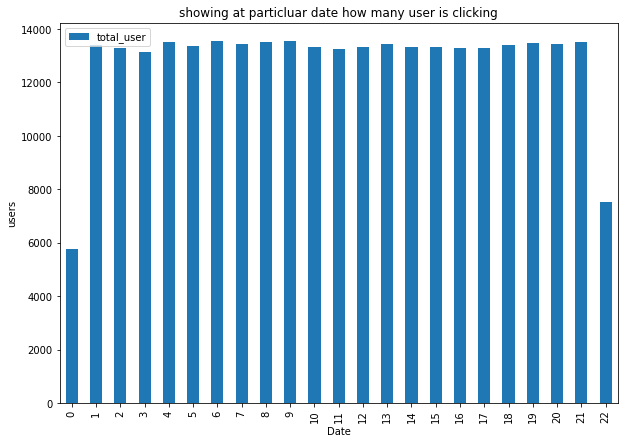

In [24]:
t_plot=f.plot(
kind='bar',
figsize=(10,7),
    title='showing at particluar date how many user is clicking'
)
t_plot.set_xlabel('Date')
t_plot.set_ylabel('users')

In [25]:
fx=f.groupby(['date','total_user']).count()
fx

,
date,total_user
2017-01-02,5783
2017-01-03,13394
2017-01-04,13284
2017-01-05,13124
2017-01-06,13528
2017-01-07,13381
2017-01-08,13564
2017-01-09,13439
2017-01-10,13523


In [26]:
df.groupby(['timestamp','group','converted']).count()['user_id'].count()['timestamp']

KeyError: 'group'